In [4]:
import os
import numpy
import polars as pl
import matplotlib.pyplot as plt
import seaborn
import glob
import pandas as pd
from typing import Dict, List


In [5]:
from os import sep


def load_files(file_path: str, pattern: str) -> Dict[str, pl.DataFrame]:
    """
    Loads files matching a specific pattern from a directory using Polars and stores them
    with their base file name (without extension) as the key in a dictionary.
    
    Args:
    - file_path (str): The directory to scan for files.
    - pattern (str): The glob pattern to match files (e.g., '*_10000_*.phased.snpden').

    Returns:
    - Dict[str, pl.DataFrame]: A dictionary with base file names as keys and Polars DataFrames as values.
    """
    snp_density_df_dictionary: Dict[str, pl.DataFrame] = {}
    
    # Use glob to get a list of files matching the pattern
    files: List[str] = glob.glob(os.path.join(file_path, pattern))
    
    if not files:
        print(f"No files matching the pattern {pattern} were found in the directory {file_path}.")
        return snp_density_df_dictionary

    # Loop through all matching files
    for file in files:
        if os.path.isfile(file):  # Ensure it's a file
            # Extract the base file name (without path and extension)
            file_basename: str = os.path.splitext(os.path.basename(file))[0]

            try:
                # Read the CSV file into a Polars DataFrame
                df: pl.DataFrame = pl.read_csv(file, separator='\t')
                snp_density_df_dictionary[file_basename] = df
            except Exception as e:
                print(f"Error reading {file}: {e}")
                continue
    
    return snp_density_df_dictionary

# Example usage
file_directory: str = "."  # Specify the directory
pattern: str = "*_10000_*.phased.snpden"  # Define the file pattern

# Load files based on the pattern
files_data: Dict[str, pl.DataFrame] = load_files(file_directory, pattern)


Error reading ./snp_density_10000_sorted_chr_10.phased.snpden: empty CSV


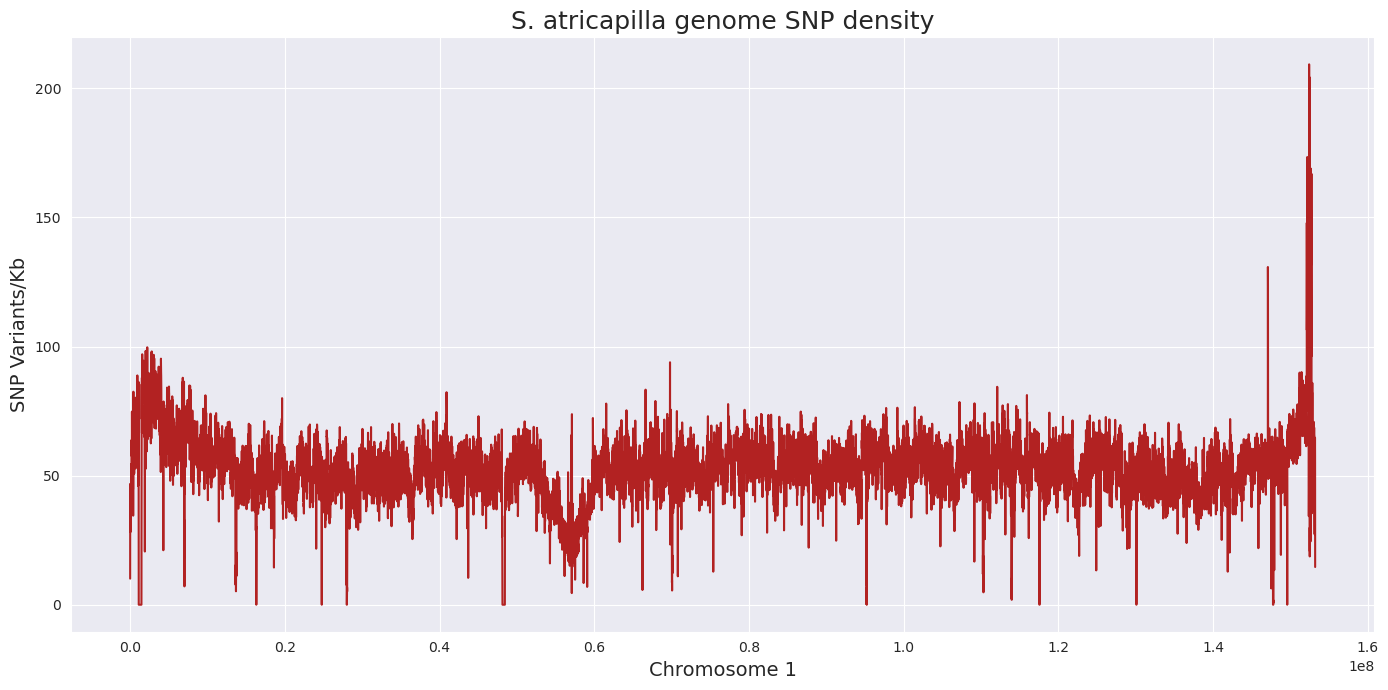

In [ ]:
chr1_10kb_snpdens = files_data.get("snp_density_10000_sorted_chr_1.phased")
chr1_10kb_snpdens_pandas = chr1_10kb_snpdens.to_pandas()
chr1_10kb_snpdens_pandas.head()

plt.figure(figsize=(14, 7))
seaborn.set_style("darkgrid")
seaborn.lineplot(data=chr1_10kb_snpdens_pandas, x="BIN_START", y="VARIANTS/KB", color="firebrick")
plt.title("S. atricapilla genome SNP density", fontsize=18)
plt.xlabel("Chromosome 1", fontsize=14)
plt.ylabel("SNP Variants/Kb", fontsize=14)
plt.tight_layout()
plt.show()